## import standard libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

import statsmodels.api as sm
#
import warnings
warnings.filterwarnings('ignore')
#
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
#
import itertools
#
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
#
from scipy.spatial.distance import euclidean as euc
#
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import glob
# import pydotplus

In [3]:
path2 = '/Users/paulraymond/Downloads/nyt-comments/Comments'
all_files2 = glob.glob(path2 + "/*")

files2 = []

for filename in all_files2:
    df = pd.read_csv(filename, index_col = None, header=0)
    files2.append(df)
    
comments = pd.concat(files2, axis=0, ignore_index=True)

In [4]:
#drop columns
comments.drop(['parentUserDisplayName', 'userTitle', 'userURL'], axis=1)

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation
0,1517529462,5a7258e410f40f00018bed7d,835.0,The snake-filled heads comment made me think o...,25791250.0,25791250.0,<br/>,comment,1.517508e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529462,Jennie,79172841.0,WA
1,1517529428,5a7258e410f40f00018bed7d,835.0,She-devil reporting for duty!,25795675.0,25795675.0,<br/>,comment,1.517527e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529428,Nice White Lady,66376882.0,Seattle
2,1517529427,5a7258e410f40f00018bed7d,835.0,XX is the new mark of the devil.,25792078.0,25792078.0,<br/>,comment,1.517511e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529427,Stan Sutton,27924638.0,"Westchester County, NY"
3,1517529425,5a7258e410f40f00018bed7d,835.0,"""Courtland Sykes"" should be writing for The On...",25791604.0,25791604.0,<br/>,comment,1.517510e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529425,Phil Carson,31909107.0,Denver
4,1517529418,5a7258e410f40f00018bed7d,835.0,"I happen to descend for a few of them, because...",25795241.0,25795241.0,<br/>,comment,1.517525e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529418,Abby,55271958.0,Tucson
5,1517529411,5a7258e410f40f00018bed7d,835.0,I don't care about the details of this troglod...,25791607.0,25791607.0,<br/>,comment,1.517510e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529411,Des Johnson,81426273.0,Forest Hills NY
6,1517529401,5a7258e410f40f00018bed7d,835.0,"As I have grown older, the more I have learned...",25794684.0,25794684.0,<br/>,comment,1.517522e+09,1.0,...,Unknown,1,approved,1.0,0.0,Op-Ed,1517529401,Jacob Sommer,54874472.0,"Medford, MA"
7,1517529401,5a7258e410f40f00018bed7d,835.0,“...a newfound freedom in the Age of Trump to ...,25791082.0,25791082.0,<br/>,comment,1.517508e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529401,Roxie,34966158.0,San Francisco
8,1517529394,5a7258e410f40f00018bed7d,835.0,"""Many women, and some men, were horrified that...",25795138.0,25795138.0,<br/>,comment,1.517524e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529394,Sipa111,73664.0,Seattle
9,1517529373,5a7258e410f40f00018bed7d,835.0,"After reading about Sykes, I'm tempted to feel...",25796019.0,25796019.0,<br/>,comment,1.517529e+09,1.0,...,Unknown,0,approved,1.0,0.0,Op-Ed,1517529373,Nanci,67991502.0,Pennsylvania


In [5]:
#add wordcount of commentBody
comments['commentBodyWordCount'] = comments['commentBody'].str.len().copy()

In [6]:
#take random sample of data
sample_comments = comments.sample(5000)
sample_comments.shape

(5000, 35)

In [7]:
# class_data = data2.drop(['userURL', 'commentBody','commentTitle', 'parentUserDisplayName','recommendedFlag','reportAbuseFlag','sectionName','userDisplayName','userLocation','userTitle', 'permID', 'editorsSelection', 'userID', 'commentID'], axis=1)
features = sample_comments[['commentType','depth','newDesk','sharing','status', 'timespeople','trusted','typeOfMaterial','recommendations','replyCount','commentBodyWordCount']]
target = sample_comments['editorsSelection']
## should i remove all columns with nulls? or remove rows with nulls? or fill with value?

In [8]:
features.isna().sum()

commentType             0
depth                   0
newDesk                 0
sharing                 0
status                  0
timespeople             0
trusted                 0
typeOfMaterial          0
recommendations         0
replyCount              0
commentBodyWordCount    0
dtype: int64

In [9]:
features.info()
#doesnt include userLocation; consider adding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1366988 to 839557
Data columns (total 11 columns):
commentType             5000 non-null object
depth                   5000 non-null float64
newDesk                 5000 non-null object
sharing                 5000 non-null int64
status                  5000 non-null object
timespeople             5000 non-null float64
trusted                 5000 non-null float64
typeOfMaterial          5000 non-null object
recommendations         5000 non-null float64
replyCount              5000 non-null float64
commentBodyWordCount    5000 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 468.8+ KB


In [10]:
features_one_hot = pd.get_dummies(features)
features_one_hot.head()

,depth,sharing,timespeople,trusted,recommendations,replyCount,commentBodyWordCount,commentType_comment,commentType_reporterReply,commentType_userReply,...,typeOfMaterial_Editorial,typeOfMaterial_Interview,typeOfMaterial_Letter,typeOfMaterial_News,typeOfMaterial_News Analysis,typeOfMaterial_Obituary (Obit),typeOfMaterial_Op-Ed,typeOfMaterial_Question,typeOfMaterial_Review,typeOfMaterial_briefing
1366988,2.0,0,1.0,0.0,0.0,0.0,260,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1187936,2.0,0,1.0,0.0,0.0,0.0,162,0,0,1,...,0,0,0,0,0,0,1,0,0,0
311015,2.0,0,1.0,0.0,40.0,0.0,527,0,0,1,...,0,0,0,1,0,0,0,0,0,0
167434,2.0,0,1.0,0.0,5.0,0.0,273,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1192711,1.0,1,1.0,0.0,31.0,0.0,516,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
#import libraries and packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
np.random.seed(0)
%matplotlib inline

## can delete

In [12]:
#create a baseline model

In [13]:
#move to top
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [14]:
#create train test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_one_hot, target, test_size=.20)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 63)
(4000,)
(1000, 63)
(1000,)


In [16]:
#create a baseline model
pipe_lr = Pipeline([('pca', PCA(n_components=20)),('clf', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [17]:
print(pipe_lr.score(X_test, y_test))
#print classification matrix

0.98


In [18]:
np.sum(pipe_lr.predict(X_test)== y_test)/len(y_test)

0.98

In [19]:
#print AUC curve

In [20]:
#import ROC and AUC libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [216]:
# logreg = LogisticRegression(fit_intercept=False)

In [217]:
# pipe_lr.fit(X_train, y_train).decision_function(X_test)
# logreg.fit(X_train, y_train).decision_function(X_test)
#double check which to use

In [21]:
# pipe_lr_score = logreg.fit(X_train, y_train).decision_function(X_test)
pipe_lr_score = pipe_lr.fit(X_train, y_train).decision_function(X_test)
#double check that this is correct

AUC: 0.8638775510204082


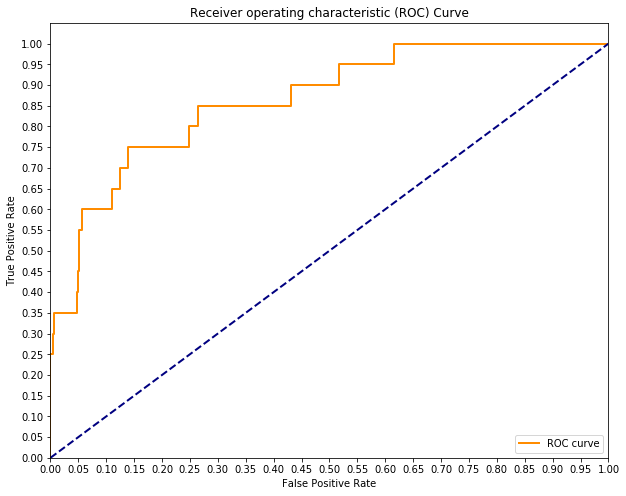

In [22]:
#false and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, pipe_lr_score)
#seaborn styling
# sns.set_style('whitegrid')
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
#print complete summary

In [24]:
#import libraries for metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [25]:
#create function for metric summeries
# def print_metrics(labels, preds):
#     print("Precision Score:{}".format(precision_score(labels, preds)))
#     print("Recall Score:{}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))
## use classification report instead

In [26]:
#print summary

In [27]:
#import classification report library
from sklearn.metrics import classification_report

In [28]:
# >>> print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_test, pipe_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.00      0.00      0.00        20

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.96      0.98      0.97      1000



In [29]:
#poor performance with selected comments

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[980  20]
 [  0   0]]


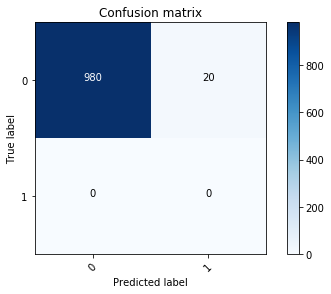

In [31]:
cnf_matrix = confusion_matrix(pipe_lr.predict(X_test), y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [32]:
#make adjustment to class imbalance

In [33]:
#run loop to find right C parameter

In [34]:
#import seaborn
import seaborn as sns

LogisticRegression(C=0.001, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.001: 0.45142857142857146
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.25      0.05      0.08        20

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.62      0.52      0.54      1000
weighted avg       0.97      0.98      0.97      1000

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC for 0.01: 0.7170918367346939
              precision    recall  f1-score   support

           0     

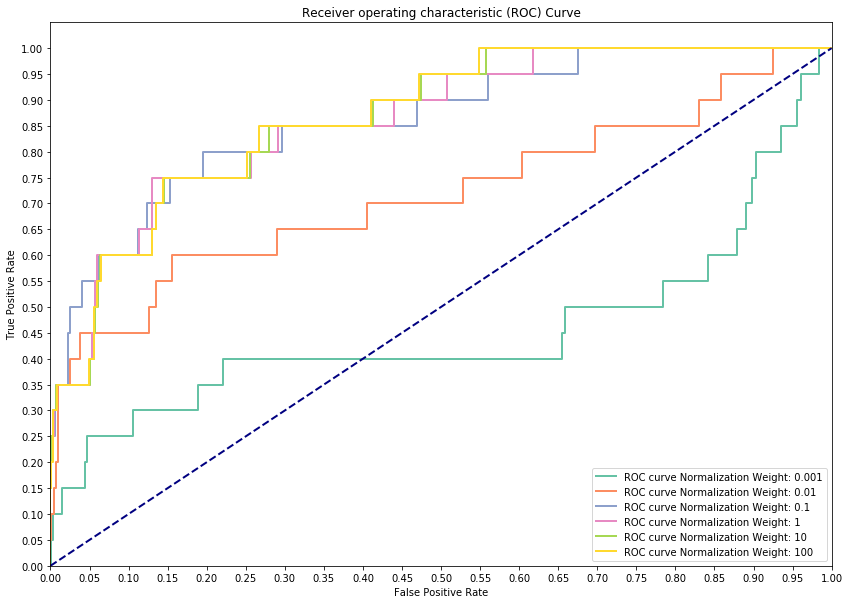

In [35]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(14,10))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
    print(classification_report(y_test, y_hat_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
#normalization weight of .1 is the best

In [37]:
#import class imbalance libraries
from imblearn.over_sampling import SMOTE, ADASYN
##can delete

In [38]:
#use SMOTE to imporve the model's performance on the minority class

In [39]:
print(y_train.value_counts())

0    3920
1      80
Name: editorsSelection, dtype: int64


In [40]:
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts())

1    3920
0    3920
dtype: int64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, random_state=0)

In [42]:
C_param_range = [0.0005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.0005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set2', n_colors=len(names))

LogisticRegression(C=0.0005, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.0005: 0.9379055462006355
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       969
           1       0.90      0.81      0.85       991

   micro avg       0.85      0.85      0.85      1960
   macro avg       0.86      0.86      0.85      1960
weighted avg       0.86      0.85      0.85      1960

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC for 0.1: 0.9465072130078863
              precision    recall  f1-score   support

           0      

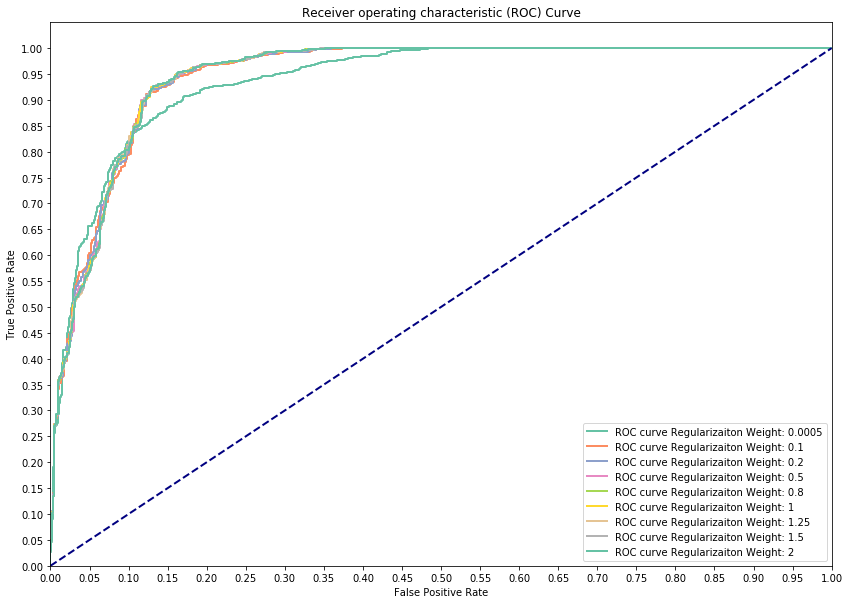

In [43]:
plt.figure(figsize=(14,10))

for n, c in enumerate(C_param_range):
    logreg = LogisticRegression(fit_intercept = False, C=c)
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #preview model params
    
    y_hat_test = logreg.predict(X_test)
    
    y_score = logreg.fit(X_train, y_train).decision_function(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n], lw=lw, label='ROC curve Regularizaiton Weight: {}'.format(names[n]))
    print(classification_report(y_test, y_hat_test))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

In [44]:
#all of the regularization weights perform very well.

Confusion matrix, without normalization
[[849  94]
 [120 897]]


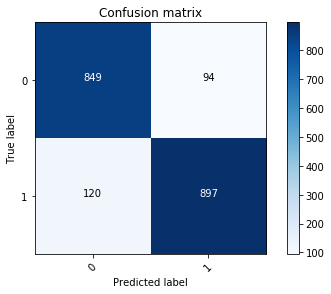

In [45]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [46]:
print(classification_report(y_test, y_hat_test))
## delete

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       969
           1       0.88      0.91      0.89       991

   micro avg       0.89      0.89      0.89      1960
   macro avg       0.89      0.89      0.89      1960
weighted avg       0.89      0.89      0.89      1960



In [47]:
#use PCA to determine number of features 

In [48]:
# features_one_hot.info()

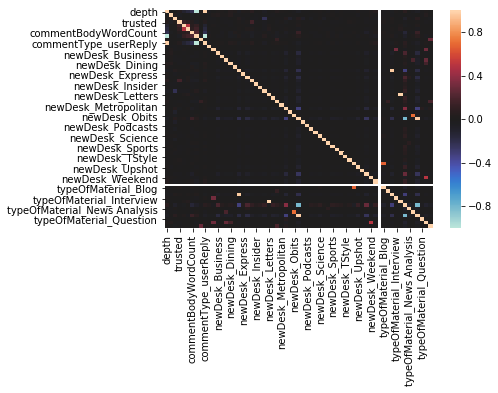

In [66]:
sns.heatmap(features_one_hot.corr(), center=0);

In [49]:
#import PCA library
from sklearn.decomposition import PCA

In [50]:
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=40)
pca_3 = PCA(n_components=55)

In [51]:
principalComponents = pca_1.fit_transform(features_one_hot)
principalComponents = pca_2.fit_transform(features_one_hot)
principalComponents = pca_3.fit_transform(features_one_hot)

In [52]:
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.9999991531757061
0.9999999041315194
0.9999999961150958


In [53]:
#there is little difference in the performance. I'll use 20 features moving forward

In [54]:
#create a pipeline consisting of linear SVM, simple decision tree, and simple Random Forest Classifier

In [55]:
#import libraries for modeling
from sklearn import svm 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [56]:
#add the standard scalar
from sklearn.preprocessing import StandardScaler
#add make_scorer
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [57]:
#create svm pipeline
pipe_svm = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=20)), ('clf', svm.SVC())])
#set svm gridsearch parameters
param_grid_svm = [
    {'clf__C': [0.01, 0.1, 1, 10] , 'clf__kernel': ['linear']}, #update with values from above
    {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']}
]
#construct svm grid search
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs_svm = GridSearchCV(estimator=pipe_svm,
                     param_grid=param_grid_svm,
                     scoring= scoring, refit='AUC',
                     cv=5, return_train_score=True)

In [58]:
#create decision tree pipeline
pipe_tree = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=20)), ('clf', tree.DecisionTreeClassifier())])
#set decision tree gridsearch parameters
#### finish adding grid search and update loop

In [59]:
#create random forest pipeline
pipe_rf = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=20)), ('clf', RandomForestClassifier())])
#set rf gridSearch parameters
param_grid_rf = [
    {'clf__n_estimators': [120], 
    'clf__criterion': ['entropy', 'gini'],
     'clf__max_depth': [4, 5, 6],
     'clf__min_samples_leaf': [0.05, 0.1, 0.2],
     'clf__min_samples_split': [0.05, 0.1, 0.2]
    }
]
#construct rf grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
                    param_grid=param_grid_rf,
                    scoring='accuracy',
                    cv=5, return_train_score=True) #update cv value

In [60]:
#List of pipelines, names
pipelines = [gs_svm, pipe_tree, gs_rf]
pipeline_names = ['Support Vector Machine', 'Decision Tree', 'Random Forest']

In [61]:
#Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'clf__C': [0.01, 0.1, 1, 10], 'clf__kernel': ['linear']}, {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=0)
Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, 

In [62]:
#print classification report

In [63]:
#compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' %(pipeline_names[index], val.score(X_test, y_test)))
    print('Classification Report:')
    print(classification_report(y_test, pipelines[index].predict(X_test)))
#     print('%s pipeline test precision: %.3f' %(pipeline_names[index], print_metrics(y_test, ))))
 #update with other metrics
#confirm if need to use x/y test or x resampled / y resampled

Support Vector Machine pipeline test accuracy: 0.980
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       969
           1       0.93      0.92      0.92       991

   micro avg       0.92      0.92      0.92      1960
   macro avg       0.92      0.92      0.92      1960
weighted avg       0.92      0.92      0.92      1960

Decision Tree pipeline test accuracy: 0.944
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       969
           1       0.94      0.95      0.94       991

   micro avg       0.94      0.94      0.94      1960
   macro avg       0.94      0.94      0.94      1960
weighted avg       0.94      0.94      0.94      1960

Random Forest pipeline test accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       969
           1       0.84    

In [64]:
#svm performed the best

AUC for 0.0005: 0.9250650071489639
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       969
           1       0.93      0.92      0.93       991

   micro avg       0.93      0.93      0.93      1960
   macro avg       0.93      0.93      0.92      1960
weighted avg       0.93      0.93      0.93      1960

AUC for 0.1: 0.9113507636843042
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       969
           1       0.92      0.90      0.91       991

   micro avg       0.91      0.91      0.91      1960
   macro avg       0.91      0.91      0.91      1960
weighted avg       0.91      0.91      0.91      1960

AUC for 0.2: 0.9224162977634623
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       969
           1       0.92      0.93      0.92       991

   micro avg       0.92      0.92      0.92      1960
   macro avg       0.92      

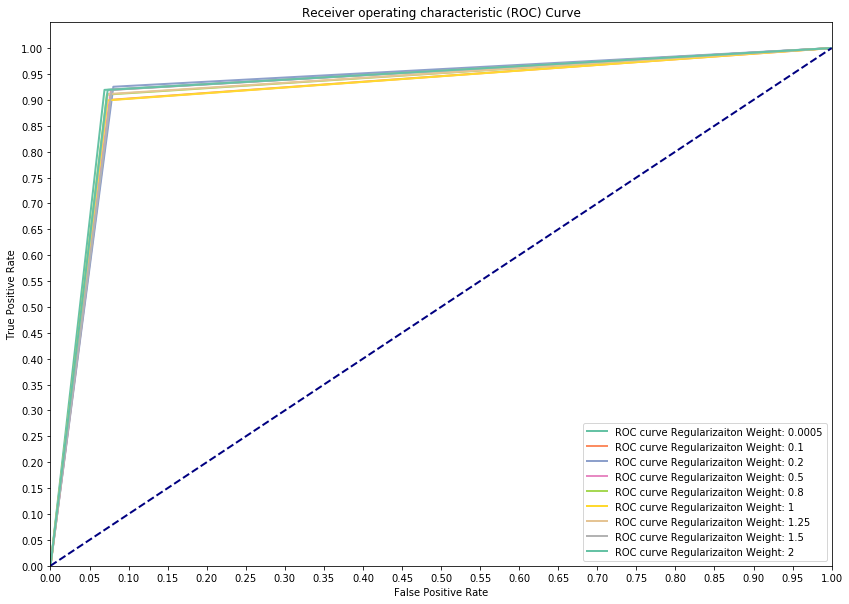

In [65]:
#print roc curve for svm
plt.figure(figsize=(14,10))

pipe_svm = Pipeline([('scale', StandardScaler()), ('pca', PCA(n_components=20)), ('clf', svm.SVC())])
#set svm gridsearch parameters
param_grid_svm = [
    {'clf__C': [0.01, 0.1, 1, 10] , 'clf__kernel': ['linear']}, #update with values from above
    {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']}
]
#construct svm grid search
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs_svm = GridSearchCV(estimator=pipe_svm,
                     param_grid=param_grid_svm,
                     scoring= scoring, refit='AUC',
                     cv=5, return_train_score=True)

for n, c in enumerate(C_param_range):

    model = gs_svm.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n], lw=lw, label='ROC curve Regularizaiton Weight: {}'.format(names[n]))
    print(classification_report(y_test, gs_svm.predict(X_test)))
    
    

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve') 
plt.legend(loc='lower right')
plt.show()

(1000, 35)

In [28]:
# try different classifcation approach
import seaborn as sns

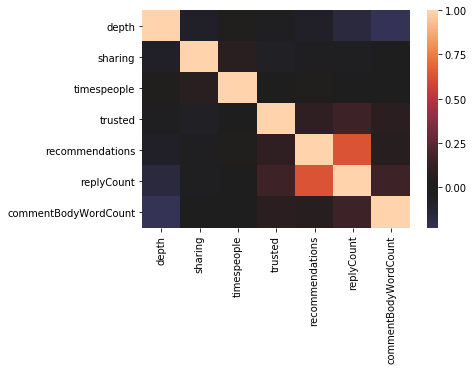

In [29]:
# look at correlation structure of features
sns.heatmap(class_data.corr(), center=0);
#change data name

In [30]:
#test algorithms first and then do PCA


In [32]:
print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

0.9999978812992735
0.9999993021352325
0.9999996043883752


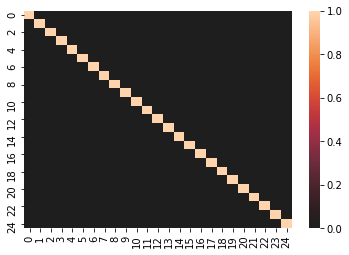

In [33]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

In [34]:
y = class_target
X = one_hot_class_data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

0.9775


0.9775

In [40]:
len(y_test)

400

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_po

Support Vector Machine pipeline test accuracy: 0.975
Decision Tree pipeline test accuracy: 0.970
Random Forest pipeline test accuracy: 0.975


In [49]:
#Pipeline with grid search
##did the pipe svm not include gridsearch?

In [61]:
#import libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [70]:
pipe_svm = Pipeline([('scl', MinMaxScaler()),('pca', PCA(n_components=20)), ('svm', svm.SVC(random_state=123))])

In [75]:
param_grid_svm = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.1, 1, 100],
         'svm__degree': [2,3,4,5],
         'svm__gamma': [0.005, 0.01]}]

In [76]:
gs_svm = GridSearchCV(estimator=pipe_svm, 
                     param_grid=param_grid_svm,
                     scoring='accuracy',
                     cv=3)
## need to add to all models

In [77]:
gs_svm.fit(X_train, y_train)
#need to debug this error

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'svm__kernel': ['poly', 'sigmoid'], 'svm__C': [0.1, 1, 100], 'svm__degree': [2, 3, 4, 5], 'svm__gamma': [0.005, 0.01]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [ ]:
#complete remaining rows

In [74]:
gs_svm.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__scl', 'estimator__pca', 'estimator__svm', 'estimator__scl__copy', 'estimator__scl__feature_range', 'estimator__pca__copy', 'estimator__pca__iterated_power', 'estimator__pca__n_components', 'estimator__pca__random_state', 'estimator__pca__svd_solver', 'estimator__pca__tol', 'estimator__pca__whiten', 'estimator__svm__C', 'estimator__svm__cache_size', 'estimator__svm__class_weight', 'estimator__svm__coef0', 'estimator__svm__decision_function_shape', 'estimator__svm__degree', 'estimator__svm__gamma', 'estimator__svm__kernel', 'estimator__svm__max_iter', 'estimator__svm__probability', 'estimator__svm__random_state', 'estimator__svm__shrinking', 'estimator__svm__tol', 'estimator__svm__verbose', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [78]:
gs_svm.score(X_test, y_test)

0.975

In [ ]:
#Random Forest pipeline with grid search